In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('Data-Melbourne_F.csv')

In [2]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score , f1_score,confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler


In [3]:
data.head(25)

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,year,month,day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,79.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,0.0,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,77.8,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,53.5,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,53.5,2014,1,7
5,2.912,3.750,247691,40.0,410.0,820.0,61.786,18.9,27.3,7.7,0.0,52,0.00,0.0,15.6,31.7,0.0,2014,1,8
6,2.355,3.507,224706,51.0,555.0,1110.0,68.820,25.9,32.4,12.1,0.0,39,0.00,0.0,26.7,46.5,59.4,2014,1,9
7,2.366,3.188,212440,41.0,365.0,730.0,62.218,17.7,24.6,13.0,0.0,69,0.00,9.8,13.1,25.9,0.0,2014,1,12
8,3.923,3.378,202676,26.0,355.0,710.0,61.433,26.4,36.0,12.7,0.0,44,0.00,0.0,19.8,51.9,64.8,2014,1,13
9,3.912,3.425,202411,42.0,530.0,830.0,66.354,35.5,43.5,28.5,0.0,20,0.00,0.0,27.8,57.6,72.2,2014,1,14


In [4]:
data.isnull().sum()

avg_outflow    0
avg_inflow     0
total_grid     0
Am             0
BOD            0
COD            0
TN             0
T              0
TM             0
Tm             0
SLP            0
H              0
PP             0
VV             0
V              0
VM             0
VG             0
year           0
month          0
day            0
dtype: int64

In [5]:
data.describe()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,year,month,day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,29.184009,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,31.366315,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,0.000000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,0.000000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,57.600000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,107.600000,2019.000000,12.000000,31.000000


In [6]:
data['target'] = (data['avg_inflow'] > data['avg_outflow']).astype(int)
print(data['target'].value_counts())

target
1    1113
0     269
Name: count, dtype: int64


In [7]:
data.head()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,...,H,PP,VV,V,VM,VG,year,month,day,target
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,...,56,1.52,10.0,26.9,53.5,79.5,2014,1,1,0
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,...,63,0.00,10.0,14.4,27.8,0.0,2014,1,2,1
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,...,47,0.25,10.0,31.9,61.1,77.8,2014,1,5,1
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,...,49,0.00,10.0,27.0,38.9,53.5,2014,1,6,1
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,...,65,0.00,10.0,20.6,35.2,53.5,2014,1,7,1


In [8]:
data.corr()

,avg_outflow,avg_inflow,total_grid,Am,BOD,COD,TN,T,TM,Tm,...,H,PP,VV,V,VM,VG,year,month,day,target
avg_outflow,1.000000,0.541923,0.167099,0.040590,-0.115811,-0.022723,-0.061951,-0.000163,0.006070,0.035516,...,-0.016560,-0.090001,-0.027635,-0.015406,-0.006319,0.000331,0.308915,-0.012221,-0.061292,-0.502091
avg_inflow,0.541923,1.000000,0.136211,-0.032709,-0.121364,0.018026,-0.035827,0.098149,0.093073,0.140905,...,-0.040534,-0.100358,-0.031872,-0.025010,-0.012203,-0.033796,0.388505,-0.066273,-0.055009,-0.008056
total_grid,0.167099,0.136211,1.000000,-0.133076,-0.136945,0.000346,-0.167448,-0.266053,-0.245119,-0.222896,...,0.155245,-0.014242,0.007085,0.020656,0.017388,0.063536,0.179876,0.272076,0.023010,-0.088369
Am,0.040590,-0.032709,-0.133076,1.000000,0.164753,0.284552,0.342995,0.110000,0.099279,0.094802,...,-0.076970,-0.074313,-0.028647,-0.047966,-0.048622,-0.059780,0.140567,-0.112396,-0.029223,-0.095445
BOD,-0.115811,-0.121364,-0.136945,0.164753,1.000000,0.524189,0.455843,0.150706,0.137368,0.133025,...,-0.087240,0.001186,-0.019039,0.001384,0.000370,-0.018185,-0.228753,-0.065866,-0.000713,0.068697
COD,-0.022723,0.018026,0.000346,0.284552,0.524189,1.000000,0.681225,0.083946,0.090018,0.052716,...,-0.152655,-0.055335,-0.050351,-0.029496,-0.006580,0.000965,0.231927,-0.034368,0.005837,-0.033532
TN,-0.061951,-0.035827,-0.167448,0.342995,0.455843,0.681225,1.000000,0.269751,0.259386,0.232274,...,-0.210108,-0.012618,-0.053080,-0.029228,0.006540,-0.013827,0.120105,-0.142140,-0.007392,-0.001403
T,-0.000163,0.098149,-0.266053,0.110000,0.150706,0.083946,0.269751,1.000000,0.924944,0.890901,...,-0.553688,-0.004256,-0.122247,0.098620,0.219791,0.125763,0.015400,-0.272413,-0.009542,0.010555
TM,0.006070,0.093073,-0.245119,0.099279,0.137368,0.090018,0.259386,0.924944,1.000000,0.759461,...,-0.533249,-0.003110,-0.120905,0.035349,0.199370,0.101250,-0.004957,-0.223353,0.006459,0.006727
Tm,0.035516,0.140905,-0.222896,0.094802,0.133025,0.052716,0.232274,0.890901,0.759461,1.000000,...,-0.386078,0.030974,-0.090034,0.123755,0.181562,0.100001,0.100206,-0.285621,-0.024275,0.015603


In [9]:
x = data.drop(['avg_inflow', 'avg_outflow', 'target'], axis=1)
y = data['target']

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =0)
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [11]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [12]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [13]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [23]:


logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [25]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  84.1
Support Vector      :  83.82
Decision Tree       :  71.97
K-NN Classifier     :  82.08
Random Forest       :  82.66


# discussion

In [28]:
x = data.drop(['avg_inflow', 'avg_outflow', 'target','VM','TM','TN'], axis=1)
y = data['target']

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =0)
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [32]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [34]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [35]:

logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [46]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [48]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  84.1
Support Vector      :  83.82
Decision Tree       :  70.23
K-NN Classifier     :  80.64
Random Forest       :  83.24


In [50]:

logreg_f1 = f1_score(ytest, logreg_ypred)
svc_classifier_f1 = f1_score(ytest, svc_classifier_ypred)
dt_classifier_f1 = f1_score(ytest, dt_classifier_ypred)
knn_classifier_f1 = f1_score(ytest, knn_classifier_ypred)
rf_classifier_f1 = f1_score(ytest, rf_classifier_ypred)



In [52]:
print ("Logistic Regression : ", round(logreg_f1*100, 2))
print ("Support Vector      : ", round(svc_classifier_f1*100, 2))
print ("Decision Tree       : ", round(dt_classifier_f1*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_f1*100, 2))
print ("Random Forest       : ", round(rf_classifier_f1*100, 2))

Logistic Regression :  91.14
Support Vector      :  91.19
Decision Tree       :  81.71
K-NN Classifier     :  88.93
Random Forest       :  90.79


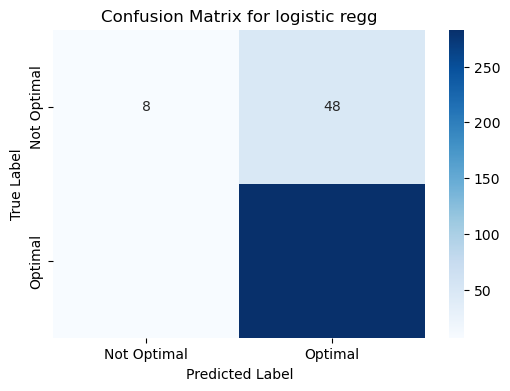

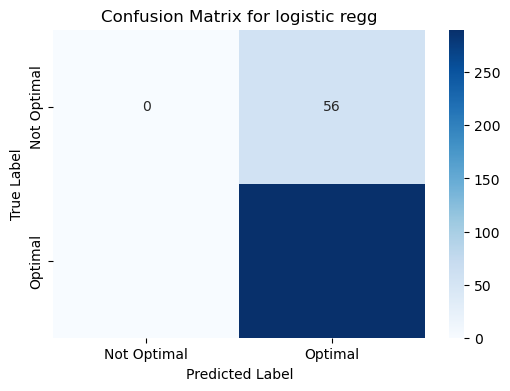

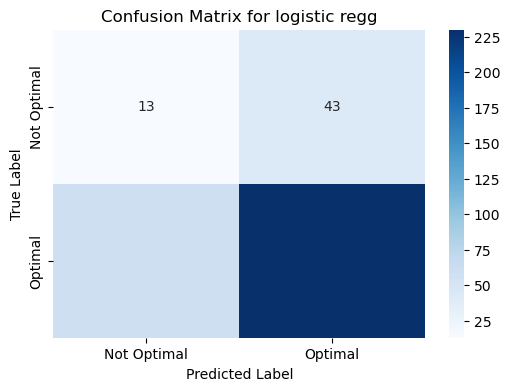

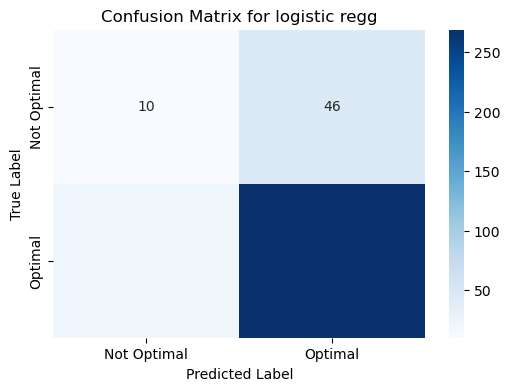

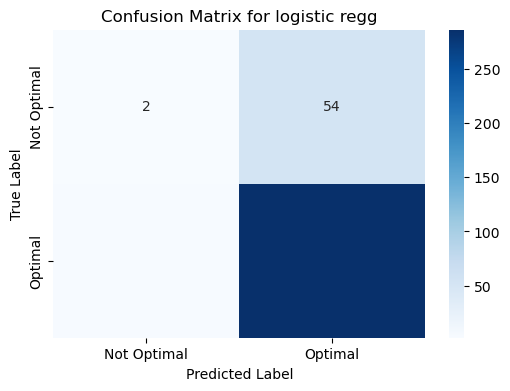

In [54]:
cm = confusion_matrix(ytest, logreg_ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Optimal', 'Optimal'],  yticklabels=['Not Optimal', 'Optimal'])    
plt.title(f"Confusion Matrix for logistic regg") 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
cm = confusion_matrix(ytest, svc_classifier_ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Optimal', 'Optimal'],  yticklabels=['Not Optimal', 'Optimal'])    
plt.title(f"Confusion Matrix for logistic regg") 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
cm = confusion_matrix(ytest, dt_classifier_ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Optimal', 'Optimal'],  yticklabels=['Not Optimal', 'Optimal'])    
plt.title(f"Confusion Matrix for logistic regg") 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
cm = confusion_matrix(ytest, knn_classifier_ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Optimal', 'Optimal'],  yticklabels=['Not Optimal', 'Optimal'])    
plt.title(f"Confusion Matrix for logistic regg") 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
cm = confusion_matrix(ytest, rf_classifier_ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Optimal', 'Optimal'],  yticklabels=['Not Optimal', 'Optimal'])    
plt.title(f"Confusion Matrix for logistic regg") 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [55]:
print(classification_report(ytest, logreg_ypred))
print(classification_report(ytest, svc_classifier_ypred))
print(classification_report(ytest, dt_classifier_ypred))
print(classification_report(ytest, knn_classifier_ypred))
print(classification_report(ytest, rf_classifier_ypred))


              precision    recall  f1-score   support

           0       0.53      0.14      0.23        56
           1       0.85      0.98      0.91       290

    accuracy                           0.84       346
   macro avg       0.69      0.56      0.57       346
weighted avg       0.80      0.84      0.80       346

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.84      1.00      0.91       290

    accuracy                           0.84       346
   macro avg       0.42      0.50      0.46       346
weighted avg       0.70      0.84      0.76       346

              precision    recall  f1-score   support

           0       0.18      0.23      0.20        56
           1       0.84      0.79      0.82       290

    accuracy                           0.70       346
   macro avg       0.51      0.51      0.51       346
weighted avg       0.73      0.70      0.72       346

              preci

In [58]:
xtest.shape

(346, 15)

In [60]:
X_train = np.array(xtrain).reshape(1036, 15)
y_train = np.array(ytrain).reshape(1036, 1)
X_test = np.array(xtest).reshape(346, 15)
y_test = np.array(ytest).reshape(346, 1)

In [62]:
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    # Sigmoid Function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Fit Model
    def fit(self, X, y):
        n_samples, n_features = X.shape  
        self.weights = np.zeros((n_features, 1))  
        self.bias = 0
        
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias  
            y_predicted = self.sigmoid(linear_model)          
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  
            db = (1 / n_samples) * np.sum(y_predicted - y)  
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # Predict
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias  
        y_predicted = self.sigmoid(linear_model)  
        return [1 if i > 0.5 else 0 for i in y_predicted.flatten()] 


lr_scratch = LogisticRegressionFromScratch(learning_rate=0.01, epochs=1000)
lr_scratch.fit(X_train, y_train)

# Predictions
y_pred_scratch = lr_scratch.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred_scratch)
f1 = f1_score(y_test, y_pred_scratch)
cm = confusion_matrix(y_test, y_pred_scratch)

In [66]:
print ("Acuracy : ", round(accuracy*100, 2))
print ("f1_score : ", round(f1*100, 2))

print("Confusion Matrix:")
print(cm)

Acuracy :  83.82
f1_score :  91.14
Confusion Matrix:
[[  2  54]
 [  2 288]]
